# Visualization

read data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



df_program = pd.read_csv('C:/Users/admin/Desktop/MCM2025/2025_Problem_C_Data/summerOly_programs_v3.0.csv')
df_athletes = pd.read_csv('C:/Users/admin/Desktop/MCM2025/2025_Problem_C_Data/summerOly_athletes_v3.0.csv')
df_host = pd.read_csv('C:/Users/admin/Desktop/MCM2025/2025_Problem_C_Data/summerOly_hosts_completed.csv')
df_medal_c = pd.read_csv('C:/Users/admin/Desktop/MCM2025/2025_Problem_C_Data/summerOly_medal_counts_completed.csv')
df_program_plot = pd.read_csv('C:/Users/admin/Desktop/MCM2025/2025_Problem_C_Data/program_plot_end.csv')

print(df_program.head())
print(df_athletes.head())
print(df_host.head())
print(df_medal_c.head())

      Sport         Discipline Code Sports Governing Body  1896  1900  1904  \
0  Aquatics  Artistic Swimming  SWA        World Aquatics     0     0     0   
1  Aquatics             Diving  DIV        World Aquatics     0     0     2   
2  Aquatics  Marathon Swimming  OWS        World Aquatics     0     0     0   
3  Aquatics           Swimming  SWM        World Aquatics     4     7     9   
4  Aquatics         Water Polo  WPO        World Aquatics     0     1     1   

   1908  1912  1920  ...  1988  1992  1996  2000  2004  2008  2012  2016  \
0     0     0     0  ...     2     2     1     2     2     2     2     2   
1     2     4     5  ...     4     4     4     8     8     8     8     8   
2     0     0     0  ...     0     0     0     0     0     2     2     2   
3     6     9    10  ...    31    31    32    32    32    32    32    32   
4     1     1     1  ...     1     1     1     2     2     2     2     2   

   2020  2024  
0     2     2  
1     8     8  
2     2     2  
3   

In [2]:
# investigate the sports in athletes file but not in the program file
print(set(df_athletes['Sport'].unique())-set(df_program['Sport'].unique()),
      '\n'


      ,len(set(df_athletes['Sport'].unique())-set(df_program['Sport'].unique())))

print(set(df_program['Sport'].unique())),
print(len(set(df_program['Sport'].unique())))


set() 
 0
{'Judo', 'Sport Climbing', 'Archery', 'Breaking', 'Rugby', 'Table Tennis', 'Baseball and Softball', 'Football', 'Flag football', 'Basketball', 'Weightlifting', 'Handball', 'Badminton', 'Fencing', 'Wrestling', 'Aquatics', 'Boxing', 'Golf', 'Shooting', 'Volleyball', 'Triathlon', 'Cycling', 'Modern Pentathlon', 'Gymnastics', 'Taekwondo', 'Equestrian', 'Rowing', 'Canoeing', 'Surfing', 'Field hockey', 'Athletics', 'Karate', 'Skateboarding', 'Sailing', 'Tennis'}
35


## Visualization of the Hosting-Effect
In order to investigate how the 'hosting-effect' affects the result, we looking to two facets:
1. How the event list changes accoding to various hosts. Does it coincede with their dominant sports? 
2. How do their performence fluctuate with being a host or not? Being a host previously, right now, or immediately?

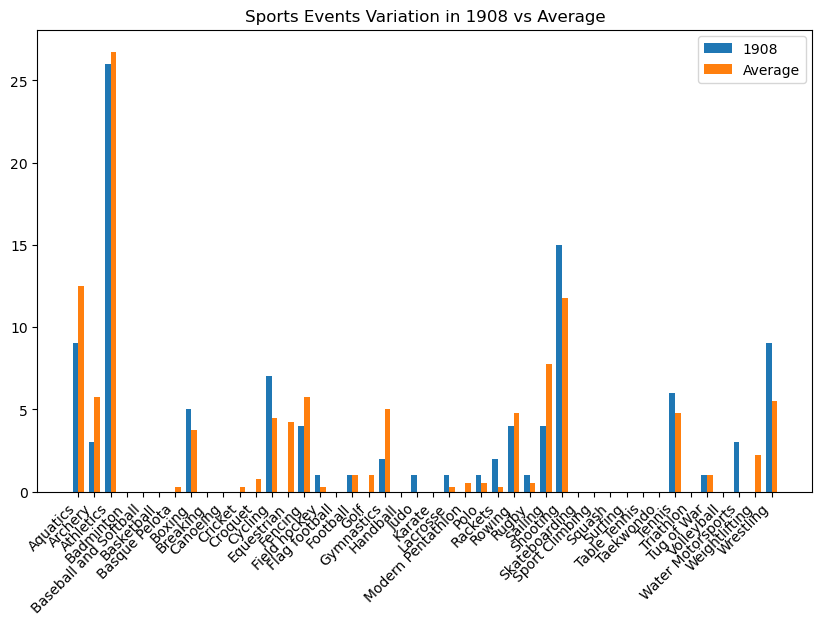

Host country: United Kingdom


In [3]:
def hosting_list_vs_average_list(year, df_program_plot, df_host, show_plot=False):
    '''
    This function looks into the chosen year and compares the variation of sports events of this certain index of Olympic Games
    with the average variation of sports events of 2 indices before and after the certain one.

    If the chosen year is the first or the 2nd one, the function will compare the variation with the average variation of
    the next 2 indices only. If the chosen year is the last or the 2nd last one, the function will compare the variation with the
    average variation of the previous 2 indices only. The function will return the list of sports events that are held in the
    chosen year but not in the average list.

    Finally, plot in one histogram the variation of sports events in the chosen year and the average distribution. Also, return the
    host country of the chosen year, and the list demonstrating the variation of list of event.

    year: int, the chosen year
    df_program_plot: DataFrame from program_plot_end.csv
    df_host: DataFrame from summerOly_hosts_completed.csv
    show_plot: bool, whether to display the plot (default: False)
    '''
    # Get year column index
    years = df_program_plot.columns[1:].tolist()
    year_str = str(year)
    if year_str not in years:
        print(f"Year {year} not found in df_program_plot.")
        return None, None
    year_index = years.index(year_str) + 1

    # Determine surrounding years
    total_years = len(years)
    if year_index < 3:
        surrounding_years = [year_index + 1, year_index + 2]
    elif year_index >= total_years - 1:
        surrounding_years = [year_index - 2, year_index - 1]
    else:
        surrounding_years = [year_index - 2, year_index - 1, year_index + 1, year_index + 2]

    # Get sports events for chosen year
    events_chosen = df_program_plot.iloc[:, year_index]

    # Get sports events for surrounding years
    events_surrounding = df_program_plot.iloc[:, surrounding_years]
    # Get average sports events for surrounding years
    events_avg = events_surrounding.mean(axis=1)

    # Compare the events_chosen with events_avg through histogram, one sport by another, with each names on x-axis,斜着写，不然会重叠
    if show_plot:
        fig, ax = plt.subplots(figsize=(10, 6))
        x = np.arange(len(events_chosen))
        width = 0.35
        ax.bar(x - width/2, events_chosen, width, label=str(year))
        ax.bar(x + width/2, events_avg, width, label='Average')
        ax.set_xticks(x)
        ax.set_xticklabels(df_program_plot['Sport'], rotation=45, ha='right')
        ax.legend()
        plt.title(f"Sports Events Variation in {year} vs Average")
        plt.show()

    # Get host country
    host_country = df_host[df_host['Year'] == year]
    host_country = host_country['Country'].values[0] if not host_country.empty else 'Unknown'

    # Get the change of sports events
    list_change = events_chosen - events_avg

    return host_country, list_change

host_country, list_change = hosting_list_vs_average_list(1908, df_program_plot, df_host, show_plot=True)
print(f"Host country: {host_country}")

In [4]:
def search(NOC_x, Year):
    df = pd.read_csv('C:/Users/admin/Desktop/MCM2025/2025_Problem_C_Data/score_rate.csv')

    df = df[(df['NOC_x'] == NOC_x)]
    df = df[(df['Year'] == Year)]
    df = df[['Sport', 'Year', 'NOC_x', 'Score_Rate']]
    return df
print(search('USA', 1908))

         Sport  Year NOC_x  Score_Rate
150   Aquatics  1908   USA    0.092593
153    Archery  1908   USA    0.055556
168  Athletics  1908   USA    0.461538
200       Judo  1908   USA    0.500000
222   Shooting  1908   USA    0.155556
236  Wrestling  1908   USA    0.111111


In [5]:
def compare(year, df_program_plot, df_host):
    # Get the host country and list change for the given year
    host_country, list_change = hosting_list_vs_average_list(year, df_program_plot, df_host)
    
    # Ensure list_change is always a list (empty if None)
    list_change = list(list_change) if list_change is not None else []
    # Get the host country for the current year from df_host
    host_data = df_host[df_host['Year'] == year]
    if not host_data.empty:
        host_country = host_data['NOC'].values[0]
    else:
        host_country = 'Unknown'
    
    # Get previous Olympics' score rates (4 years ago and 8 years ago)
    score_rate_4_years_ago = search(host_country, year - 4)
    score_rate_8_years_ago = search(host_country, year - 8)

    # Extract the sports in the program for the given year
    sports = set(df_program_plot['Sport'].unique())

    # Initialize the list to store the calculated award rates
    award_rates = []

    # Calculate and store the award rates for each sport
    for sport in sports:
        # Filter score rates for 4 and 8 years ago for the given sport
        score_rate_4_years_ago_sport = score_rate_4_years_ago[score_rate_4_years_ago['Sport'] == sport]
        score_rate_8_years_ago_sport = score_rate_8_years_ago[score_rate_8_years_ago['Sport'] == sport]

        # Default values for 4 years ago and 8 years ago (if no data is available)
        score_rate_4 = 0
        score_rate_8 = 0

        # Assign values if data exists
        if not score_rate_4_years_ago_sport.empty:
            score_rate_4 = score_rate_4_years_ago_sport['Score_Rate'].values[0]

        if not score_rate_8_years_ago_sport.empty:
            score_rate_8 = score_rate_8_years_ago_sport['Score_Rate'].values[0]

        # Calculate weighted score 
        weighted_score = (score_rate_8 * 0.3) + (score_rate_4 * 0.7)

        # Append the calculated score rate to the award_rates list
        award_rates.append(weighted_score)
    return host_country, award_rates

# Example usage
host_country, award_rates = compare(1996, df_program_plot, df_host)

# Example output (award_rates will be a list of calculated award rates)
print(f"Calculated Award Rates: {award_rates}")


Calculated Award Rates: [0.03809523809523808, 0.0, 0.075, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1266666666666666, 0.2872807017543859, 0.12499999999999997, 0.0, 0.052564102564102544, 0.1916666666666666, 0.0, 0.0, 0.028888888888888856, 0.0, 0.05777777777777771, 0.0, 0.0, 0.07222222222222219, 0.0, 0.0, 0.0595238095238095, 0.061458333333333295, 0.0, 0.0, 0.23845514950166108, 0.0, 0.0, 0.0, 0.2545833333333333, 0.0, 0.31666666666666665, 0.0]


## Spearman relation

In [11]:
from scipy.stats import spearmanr

# Function to replace negative numbers with 0
def replace_negative_with_zero(lst):
    return [max(0, x) for x in lst]

# Call the compare function and calculate Spearman correlation coefficient
def calculate_spearman_for_year(year, df_program_plot, df_host):
    # Step 1: Call the compare function to get list_change and award_rates
    host_country, list_change = compare(year, df_program_plot, df_host)  # The result includes list_change
    
    # Step 2: Modify list_change by replacing negative numbers with 0
    list_change = replace_negative_with_zero(list_change)  # list_change is a numerical list
    
    # Step 3: Calculate Spearman correlation coefficient
    spearman_corr, _ = spearmanr(list_change, award_rates)  # award_rates is returned from the compare function
    
    # Return the Spearman correlation coefficient
    return spearman_corr

# Get all Olympic years (assuming the years are already present in df_host)
years = df_host['Year'].unique()

# Iterate through all Olympic years and calculate Spearman correlation coefficient
for year in years:
    spearman_corr = calculate_spearman_for_year(year, df_program_plot, df_host)
    print(f"Spearman correlation for {year}: {spearman_corr}")


C:\Users\admin\AppData\Local\Temp\ipykernel_131668\579625657.py:16: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, _ = spearmanr(list_change, award_rates)  # award_rates 从 compare 中返回


Spearman correlation for 1896: nan
Spearman correlation for 1900: 0.1276326681563402
Spearman correlation for 1904: 0.41252733088942106
Spearman correlation for 1908: 0.4022167068234355
Spearman correlation for 1912: 0.6095438083440823
Spearman correlation for 1920: 0.23505660738602013
Spearman correlation for 1924: 0.42468599710455956
Spearman correlation for 1928: 0.4144565530559811
Spearman correlation for 1932: 0.5573060675342795
Spearman correlation for 1936: 0.3403796399488517
Spearman correlation for 1948: nan


C:\Users\admin\AppData\Local\Temp\ipykernel_131668\579625657.py:16: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  spearman_corr, _ = spearmanr(list_change, award_rates)  # award_rates 从 compare 中返回


Spearman correlation for 1952: 0.4012639751550397
Spearman correlation for 1956: 0.3721030936632304
Spearman correlation for 1960: 0.47782918912674716
Spearman correlation for 1964: 0.3025803422119549
Spearman correlation for 1968: 0.33780907071659166
Spearman correlation for 1972: 0.6052086732194841
Spearman correlation for 1976: 0.3205900972930766
Spearman correlation for 1980: 0.5885614594268345
Spearman correlation for 1984: 0.7585127168916204
Spearman correlation for 1988: 0.38509525652886967
Spearman correlation for 1992: 0.6896533135134602
Spearman correlation for 1996: 1.0
Spearman correlation for 2000: 0.5969582198893243
Spearman correlation for 2004: 0.2433166296747961
Spearman correlation for 2008: 0.4171468222880471
Spearman correlation for 2012: 0.5363408850626475
Spearman correlation for 2016: 0.3723186914784992
Spearman correlation for 2020: 0.42735432569074944
Spearman correlation for 2024: 0.424005444483231
Year 2028 not found in df_program_plot.
Spearman correlation f

## DTW

In [29]:
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean

def DTW(year, df_program_plot, df_host):
    host_country, list_change = hosting_list_vs_average_list(year, df_program_plot, df_host)
    # Ensure list_change is always a list (empty if None)
    if list_change is None:
        list_change = []
    else:
        list_change = list(list_change)  # No conflict with list here

    # Replace negative values with zero
    cleaned_list = replace_negative_with_zero(list_change)

    # Print the cleaned list
    print("Cleaned list_change:", cleaned_list)

    # Obtain award rates
    host_country, award_rates = compare(1996, df_program_plot, df_host)

    # Ensure both lists are of the same length for DTW (if not, you can pad with zeros or truncate)
    min_len = min(len(cleaned_list), len(award_rates))
    list1 = cleaned_list[:min_len]
    list2 = award_rates[:min_len]

    # Ensure the lists are in the correct shape for DTW (1D lists of numbers)
    # Each list element should be a scalar, not an array, hence the following line:
    list1 = [(x,) for x in list1]  # Convert each number to a tuple (x,)
    list2 = [(x,) for x in list2]  # Convert each number to a tuple (x,)

    # Calculate the Dynamic Time Warping distance
    distance, path = fastdtw(list1, list2, dist=euclidean)

    # Print the DTW distance
    print(f"DTW distance for {year}: {distance}")

years = df_host['Year'].unique()


for year in years:
    DTW(year, df_program_plot, df_host) 


Cleaned list_change: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 2.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
DTW distance for 1896: 5.077954820152647
Cleaned list_change: [0, 2.5, 0, 0, 0, 0, 1.0, 0, 0, 0, 1.0, 3.0, 0, 5.0, 2.5, 0, 0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0.5, 0.5, 11.0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 0]
DTW distance for 1900: 28.601350810127585
Cleaned list_change: [3.25, 3.5, 2.25, 0, 0, 0, 0, 5.75, 0, 0, 0, 0, 2.5, 0, 0.25, 0, 0, 0.25, 1.5, 7.25, 0, 0, 0, 0.75, 0, 0, 0.5, 1.75, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.25, 0, 0, 1.0, 3.25]
DTW distance for 1904: 32.57781697554112
Cleaned list_change: [0, 0, 0, 0, 0, 0, 0, 1.25, 0, 0, 0, 0, 2.5, 0, 0, 0.75, 0, 0, 0, 0, 0, 1.0, 0, 0.75, 0, 0.5, 1.75, 0, 0.5, 0, 3.25, 0, 0, 0, 0, 0, 0, 1.25, 0, 0, 0, 3.0, 0, 3.5]
DTW distance for 1908: 19.141379246603393
Cleaned list_change: [0.5, 0, 3.25, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0, 0, 

## fourier transform

In [34]:
import numpy as np

def fourier_transform(year, df_program_plot, df_host):
    # Get the list_change data
    host_country, list_change = hosting_list_vs_average_list(year, df_program_plot, df_host)

    # Ensure list_change is a list
    if list_change is None:
        list_change = []
    else:
        list_change = list(list_change)

    # Replace negative values with 0
    cleaned_list = replace_negative_with_zero(list_change)

    # Debug: Print the processed list (optional)
    # print(f"Cleaned list_change for {year}:", cleaned_list)

    # Get award_rates
    host_country, award_rates = compare(1996, df_program_plot, df_host)

    # Ensure both lists have the same length
    min_len = min(len(cleaned_list), len(award_rates))
    list1 = cleaned_list[:min_len]
    list2 = award_rates[:min_len]

    # Apply Fourier Transform to both time series
    fft_list1 = np.fft.fft(list1)
    fft_list2 = np.fft.fft(list2)

    # Calculate the Euclidean distance between the two spectra (other distance metrics can be used)
    distance = np.linalg.norm(np.abs(fft_list1) - np.abs(fft_list2))

    # Output the distance after Fourier Transform
    print(f"Fourier Transform distance for {year}: {distance}")

# Get all Olympic years (assuming the years are already present in df_host)
years = df_host['Year'].unique()

# Iterate through all Olympic years and calculate the Fourier Transform distance
for year in years:
    fourier_transform(year, df_program_plot, df_host)


Fourier Transform distance for 1896: 12.448967630972746
Fourier Transform distance for 1900: 83.2692176781252
Fourier Transform distance for 1904: 73.66071638341225
Fourier Transform distance for 1908: 41.39282408427074
Fourier Transform distance for 1912: 51.44553152954613
Fourier Transform distance for 1920: 117.15237745523365
Fourier Transform distance for 1924: 30.22102920181615
Fourier Transform distance for 1928: 3.015351353691441
Fourier Transform distance for 1932: 11.335150528250436
Fourier Transform distance for 1936: 27.450713045043855
Fourier Transform distance for 1948: 17.64138246829097
Fourier Transform distance for 1952: 23.701829312717788
Fourier Transform distance for 1956: 13.734304076990595
Fourier Transform distance for 1960: 2.542049368998952
Fourier Transform distance for 1964: 14.849754107333728
Fourier Transform distance for 1968: 42.78751375178283
Fourier Transform distance for 1972: 34.78965985802696
Fourier Transform distance for 1976: 21.888831677347515
Fou

ValueError: Invalid number of FFT data points (0) specified.

## shape based distance

In [32]:
import numpy as np

def shape_based_distance(year, df_program_plot, df_host):
    # Retrieve the list_change data
    host_country, list_change = hosting_list_vs_average_list(year, df_program_plot, df_host)

    # Ensure list_change is a list
    if list_change is None:
        list_change = []
    else:
        list_change = list(list_change)

    # Replace negative values with 0
    cleaned_list = replace_negative_with_zero(list_change)

    # Retrieve award_rates
    host_country, award_rates = compare(1996, df_program_plot, df_host)

    # Ensure both lists have the same length
    min_len = min(len(cleaned_list), len(award_rates))
    list1 = cleaned_list[:min_len]
    list2 = award_rates[:min_len]

    # Calculate the Euclidean distance between the two time series (shape-based distance)
    distance = np.linalg.norm(np.array(list1) - np.array(list2))

    # Output the shape-based distance
    print(f"Shape-Based distance for {year}: {distance}")

# Get all Olympic years (assuming the years are already present in df_host)
years = df_host['Year'].unique()

# Iterate through all Olympic years and calculate the shape-based distance
for year in years:
    shape_based_distance(year, df_program_plot, df_host)


Shape-Based distance for 1896: 2.5515772591769657
Shape-Based distance for 1900: 13.059032287552045
Shape-Based distance for 1904: 11.676501016997415
Shape-Based distance for 1908: 6.8410518894387495
Shape-Based distance for 1912: 8.341526382057717
Shape-Based distance for 1920: 18.130257061407697
Shape-Based distance for 1924: 5.0951892779090615
Shape-Based distance for 1928: 0.9310779552066752
Shape-Based distance for 1932: 2.3925792355610556
Shape-Based distance for 1936: 4.452446288675882
Shape-Based distance for 1948: 2.988675950391682
Shape-Based distance for 1952: 4.13366824699512
Shape-Based distance for 1956: 2.582847665872804
Shape-Based distance for 1960: 0.8720931771026744
Shape-Based distance for 1964: 2.667966736964507
Shape-Based distance for 1968: 7.042558472805347
Shape-Based distance for 1972: 5.577291585544363
Shape-Based distance for 1976: 3.8555198986694665
Shape-Based distance for 1980: 2.222258113931334
Shape-Based distance for 1984: 2.2417465204456075
Shape-Base

## feature processing (host distance avg_score avg_scorerate)

In [35]:
import pandas as pd

# Read score_rate.csv
score_rate_df = pd.read_csv('C:/Users/admin/Desktop/MCM2025/2025_Problem_C_Data/score_rate.csv')

# Read summerOly_hosts_completed.csv
hosts_df = pd.read_csv('C:/Users/admin/Desktop/MCM2025/2025_Problem_C_Data/summerOly_hosts_completed.csv')

# We only need the NOC and Year columns to determine the host country
# Merge the data: Merge based on Year and NOC
merged_df = pd.merge(score_rate_df, hosts_df[['Year', 'NOC']], on='Year', how='left')

# Add a new column in merged_df to check if it's the host country
merged_df['Host'] = merged_df.apply(lambda row: 1 if row['NOC_x'] == row['NOC'] else 0, axis=1)

# Drop intermediate columns created during the merge
merged_df = merged_df.drop(columns=['NOC'])

# Output the merged DataFrame to check the result
print(merged_df)

# Optionally save the result to a new CSV file
merged_df.to_csv('score_rate_with_host.csv', index=False)


          Sport  Year  Score_x NOC_x  Score_y  Score_Rate  Host
0      Aquatics  1896       24   AUT      5.0    0.208333     0
1      Aquatics  1896       24   GRE     11.0    0.458333     1
2      Aquatics  1896       24   HUN      6.0    0.250000     0
3     Athletics  1896       72   AUS      6.0    0.083333     0
4     Athletics  1896       72   FRA      3.0    0.041667     0
...         ...   ...      ...   ...      ...         ...   ...
8290  Wrestling  2024      108   ROU      0.0    0.000000     0
8291  Wrestling  2024      108   TUR      2.0    0.018519     0
8292  Wrestling  2024      108   UKR      5.0    0.046296     0
8293  Wrestling  2024      108   USA     12.0    0.111111     0
8294  Wrestling  2024      108   UZB      4.0    0.037037     0

[8295 rows x 7 columns]


In [45]:
import pandas as pd

# 1. Read data
if_host_df = pd.read_csv('C:/Users/admin/Desktop/MCM2025/MCM2025/2025_Problem_C_Data/if_host.csv')
sport_df = pd.read_csv('C:/Users/admin/Desktop/MCM2025/MCM2025/2025_Problem_C_Data/score_rate_with_host.csv')
host_complete_df = pd.read_csv('C:/Users/admin/Desktop/MCM2025/MCM2025/2025_Problem_C_Data/summerOly_hosts_completed.csv')

# 2. Merge the if_host data with the complete host city data
merged_df = pd.merge(if_host_df, sport_df, how='left', left_on=['Year', 'NOC_x'], right_on=['Year', 'NOC_x'])

# 3. Filter rows where the distance is 0, keeping only Olympic events hosted by the country
filtered_df = merged_df[merged_df['distance'] == 0]

# 4. Calculate the total Score_Rate for all events a country participated in during each Olympic year
# Group by country (NOC_x) and year, then compute the sum of Score_Rate
score_rate_sum_per_country_year = filtered_df.groupby(['NOC_x', 'Year'])['Score_Rate'].sum().reset_index()

# 5. Calculate the average of total Score_Rate sums for all Olympic years a country participated in
# First, group by country to compute the mean of Score_Rate sums
score_rate_avg_per_country = score_rate_sum_per_country_year.groupby('NOC_x')['Score_Rate'].mean().reset_index()

# 6. Rename the column to make it more descriptive
score_rate_avg_per_country.rename(columns={'Score_Rate': 'Average_Score_Rate_Sum'}, inplace=True)

# 7. Save the result to an Excel file
score_rate_avg_per_country.to_excel('average_score_rate_sum_by_noc.xlsx', index=False)

print("Excel file generated: average_score_rate_sum_by_noc.xlsx")


Excel文件已生成：average_score_rate_sum_by_noc.xlsx


In [48]:
# Filter rows where the distance is not 0
filtered_if_host_df = if_host_df[if_host_df['distance'] != 0]

# 3. Merge the filtered if_host data with sport data to retrieve each event's Score_Rate, along with corresponding NOC and Year
merged_df = pd.merge(filtered_if_host_df, sport_df, how='left', left_on=['Year', 'NOC_x'], right_on=['Year', 'NOC_x'])

# 4. Calculate the total Score_Rate for all events a country participated in during each Olympic year, keeping the distance column
score_rate_sum_per_country_year = merged_df.groupby(['NOC_x', 'Year', 'distance'])['Score_Rate'].sum().reset_index()

# 5. Rename the column to make it more descriptive
score_rate_sum_per_country_year.rename(columns={'Score_Rate': 'Score_Rate_Sum'}, inplace=True)

# 6. Save the result to an Excel file
score_rate_sum_per_country_year.to_excel('score_rate_sum_for_hosting_countries_with_distance.xlsx', index=False)

print("Excel file generated: score_rate_sum_for_hosting_countries_with_distance.xlsx")


Excel文件已生成：score_rate_sum_for_hosting_countries_with_distance.xlsx


最大 P(ch): 279.5827709530906, 最小 P(ch): 62.183944598598934


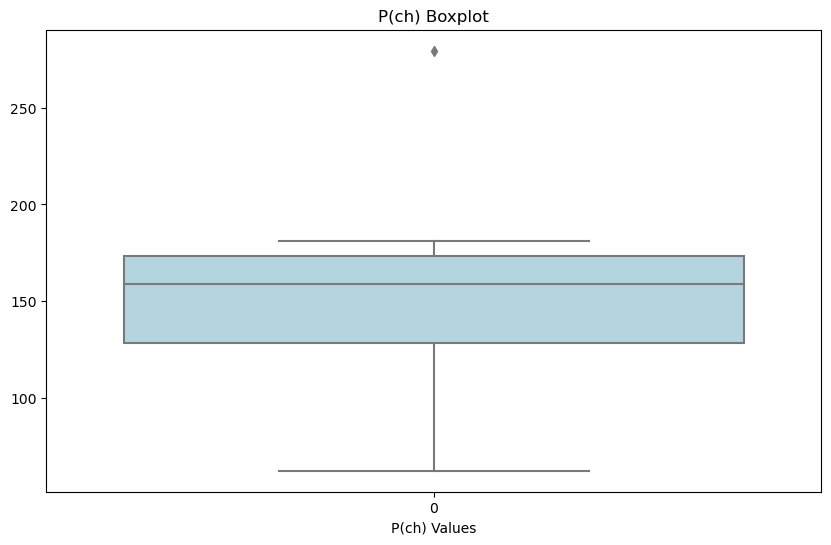

去除极值后的最小 P(ch) 值为 62.183944598598934，对应的 ch 值为 0.5050505050505051


In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Read the data
score_rate_df = pd.read_excel('C:/Users/admin/Desktop/MCM2025/MCM2025/2025_Problem_C_Data/score_rate_sum_for_hosting_countries_with_distance.xlsx')
average_score_df = pd.read_excel('C:/Users/admin/Desktop/MCM2025/MCM2025/2025_Problem_C_Data/average_score_rate_sum_nonhost.xlsx')

# 2. Merge data based on NOC_x using a left join, obtaining S1 (Score_Rate_Sum) and S2 (Average_Score_Rate_Sum) for each country
merged_df = pd.merge(score_rate_df, average_score_df, how='left', left_on='NOC_x', right_on='NOC_x')

# 3. Define a function to calculate P(ch)
def calculate_P(ch, df):
    P_ch = 0
    for _, row in df.iterrows():
        S1 = row['Score_Rate_Sum']  # Score_Rate_Sum
        S2 = row['Average_Score_Rate_Sum']  # Average_Score_Rate_Sum
        distance = row['distance']
        P_ch += (S1 / (1 + distance * ch) - S2) ** 2
    return P_ch

# 4. Iterate through different ch values, calculate P(ch), and store each P(ch) value
ch_values = np.linspace(0, 10, 100)  # Adjust range and step size as needed
P_values = []

for ch in ch_values:
    P_ch = calculate_P(ch, merged_df)
    P_values.append(P_ch)

# 5. Find the maximum and minimum P(ch) values
max_P = max(P_values)
min_P = min(P_values)
print(f"Maximum P(ch): {max_P}, Minimum P(ch): {min_P}")

# 6. Plot a boxplot for P(ch) values
plt.figure(figsize=(10, 6))
sns.boxplot(data=P_values, color="lightblue")
plt.title('P(ch) Boxplot')
plt.xlabel('P(ch) Values')
plt.show()

# 7. Calculate the IQR (Inter-Quartile Range) to detect outliers
Q1 = np.percentile(P_values, 25)
Q3 = np.percentile(P_values, 75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 8. Remove outliers from P(ch) values
filtered_P_values = [P for P in P_values if lower_bound <= P <= upper_bound]

# 9. Recalculate the minimum P(ch) and its corresponding ch value (after removing outliers)
min_P_filtered = min(filtered_P_values)
best_ch_filtered = ch_values[P_values.index(min_P_filtered)]

print(f"After removing outliers, the minimum P(ch) is {min_P_filtered}, corresponding to ch value {best_ch_filtered}")


## Final model input table processing

In [95]:
import pandas as pd
import numpy as np

# Load the data
df = pd.read_csv('feature_noc.csv')
athletes_df = pd.read_csv('C:/Users/admin/Desktop/MCM2025/MCM2025/2025_Problem_C_Data/summerOly_athletes_completed.csv')

# List of sports in the specified order
sports = [
    "Aquatics", "Archery", "Athletics", "Badminton", "Baseball and Softball", "Basketball", 
    "Boxing", "Breaking", "Canoeing", "Cycling", "Equestrian", "Fencing", "Field hockey", 
    "Flag football", "Football", "Golf", "Gymnastics", "Handball", "Judo", "Karate", 
    "Modern Pentathlon", "Rowing", "Rugby", "Sailing", "Shooting", "Skateboarding", 
    "Sport Climbing", "Surfing", "Table Tennis", "Taekwondo", "Tennis", "Triathlon", 
    "Volleyball", "Weightlifting", "Wrestling"
]

# Initialize lists to store participation and changes
changes_list = []
participation_list = []

# Get all unique years and sort them
years = df['Year'].unique()
years.sort()

# Iterate through each year in the data
for i, year in enumerate(years):
    # Filter the data for the current year
    current_year_data = athletes_df[athletes_df['Year'] == year]
    
    # Initialize participation counts for all sports (default to 0)
    participation_counts = [0] * len(sports)
    for sport in current_year_data['Sport'].unique():
        if sport in sports:  # Only include the specified sports
            participation_counts[sports.index(sport)] = current_year_data[current_year_data['Sport'] == sport].shape[0]

    # Handle the first Olympic year
    if i == 0:
        # For the first year, the participation increase is the same as participation counts (no prior data)
        participation_increase = participation_counts
    else:
        prev_year = year - 4  # The year of the previous Olympics
        
        # Check if the previous year has data
        if prev_year in athletes_df['Year'].unique():
            prev_year_data = athletes_df[athletes_df['Year'] == prev_year]
            
            # Initialize participation counts for the previous year
            prev_participation_counts = [0] * len(sports)
            for sport in prev_year_data['Sport'].unique():
                if sport in sports:
                    prev_participation_counts[sports.index(sport)] = prev_year_data[prev_year_data['Sport'] == sport].shape[0]
            
            # Calculate participation increase: current year - previous year
            participation_increase = [current - prev for current, prev in zip(participation_counts, prev_participation_counts)]
        else:
            # If no data for the previous year, assume participation counts were 0
            participation_increase = participation_counts
    
    # Add participation increase to the list for all rows of the current year
    participation_list.extend([participation_increase] * len(df[df['Year'] == year]))

    # Handle changes in events (Event_Changes)
    if i == 0:
        # For the first year, all changes are 0
        changes = [0] * len(sports)
        changes_list.extend([changes] * len(df[df['Year'] == year]))
    else:
        prev_year = year - 4
        
        if prev_year in athletes_df['Year'].unique():
            prev_year_data = athletes_df[athletes_df['Year'] == prev_year]
            
            # Initialize counts for the previous year's sports
            prev_sports_count = [0] * len(sports)
            for sport in prev_year_data['Sport'].unique():
                if sport in sports:
                    prev_sports_count[sports.index(sport)] = prev_year_data[prev_year_data['Sport'] == sport].shape[0]

            # Calculate changes in events: current year - previous year
            changes = [current - prev for current, prev in zip(participation_counts, prev_sports_count)]
        else:
            # If no data for the previous year, assume changes are equal to participation counts
            changes = participation_counts
        
        # Add changes to the list for all rows of the current year
        changes_list.extend([changes] * len(df[df['Year'] == year]))

# Add participation increase and event changes as new columns in the DataFrame
df['Participation_List'] = participation_list
df['Event_Changes'] = changes_list

# Save the updated DataFrame to a CSV file
df.to_csv('feature_noc(2).csv', index=False)


In [104]:
import pandas as pd
import ast

# Read the CSV file
df = pd.read_csv('feature_Noc.csv')

# Initialize dictionaries to store the number of participating countries and athletes per year
participating_countries = {}
participating_athletes = {}

# Iterate through the data to calculate the number of participating countries and athletes per year
for index, row in df.iterrows():
    year = row['Year']
    participatelist = ast.literal_eval(row['Participants_List'])  # Convert string to a list
    
    # Initialize data for the year if not already in the dictionaries
    if year not in participating_countries:
        participating_countries[year] = [0] * 34  # Initialize with 34 sports (or categories)
        participating_athletes[year] = [0] * 34  # Same initialization for athletes
    
    # Update the number of participating countries and athletes for each sport
    for i, participants in enumerate(participatelist):
        participants = int(participants)  # Ensure participant count is an integer
        if participants > 0:
            participating_countries[year][i] += 1  # Increment the country count if participants > 0
        participating_athletes[year][i] += participants  # Add the number of participants

# Function to calculate the change between two years
def calculate_changes(year, previous_year, current_data, previous_data):
    if previous_year not in previous_data:  # If there is no data for the previous year
        return [x for x in current_data]  # Return the current data as the change
    # Calculate the change by subtracting previous year data from current year data
    return [current - previous for current, previous in zip(current_data, previous_data[previous_year])]

# Add new columns for changes
country_changes = []
athlete_changes = []

for index, row in df.iterrows():
    year = row['Year']
    previous_year = year - 4  # Olympics occur every 4 years
    participatelist = ast.literal_eval(row['Participants_List'])  # Convert string to a list
    
    # Calculate changes for countries and athletes
    country_change = calculate_changes(year, previous_year, participating_countries[year], participating_countries)
    athlete_change = calculate_changes(year, previous_year, participating_athletes[year], participating_athletes)
    
    # Append the changes to the respective lists
    country_changes.append(country_change)
    athlete_changes.append(athlete_change)

# Add the new columns to the DataFrame
df['CountryChange'] = country_changes
df['AthleteChange'] = athlete_changes

# Save the updated DataFrame to a new CSV file
df.to_csv('feature_Noc_with_changes.csv', index=False)

print("Processing complete. Results saved to 'feature_Noc_with_changes.csv'")


处理完成，结果已保存到 'feature_Noc_with_changes.csv'


## model

In [106]:


import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

class OlympicPredictionModel:
    def __init__(self, lambda_weight=0.3, mu_weight=0.3):
        """
        初始化模型权重
        :param lambda_weight: 小小国权重
        :param mu_weight: 大国权重
        """
        self.lambda_weight = lambda_weight
        self.mu_weight = mu_weight
        self.classifier = RandomForestClassifier()
        self.regressor1 = RandomForestRegressor()
        self.regressor2 = RandomForestRegressor()
        self.lstm_models = {}

    @staticmethod
    def calculate_w4_vector(country_change, athlete_change, event_changes):
        """
        矢量化计算 W4
        """
        w1 = np.sum(country_change, axis=1)
        w2 = np.sum(athlete_change, axis=1)
        w3 = np.sum(event_changes, axis=1)
        return (w1 + w2) / 2 * w3

    def preprocess_data(self, data):
        """
        数据预处理，包括计算 featureA, featureB, featureC
        """
        # Feature A
        score_rate_list = np.array(data['Score_Rate_List'].apply(eval).tolist())
        score_list = np.array(data['Score_List'].apply(eval).tolist(), dtype=np.float64)
        participants_list = np.array(data['Participants_List'].apply(eval).tolist(), dtype=np.float64)

        v5_5_a = np.sum(score_rate_list, axis=1)
        v8_5_a = np.sum(np.divide(score_list, participants_list, 
                                  out=np.zeros_like(score_list, dtype=np.float64), 
                                  where=participants_list > 0), axis=1)

        country_change = np.array(data['CountryChange'].apply(eval).tolist())
        athlete_change = np.array(data['AthleteChange'].apply(eval).tolist())
        event_changes = np.array(data['Event_Changes'].apply(eval).tolist())
        w4 = self.calculate_w4_vector(country_change, athlete_change, event_changes)

        v8_w4 = np.sum(np.multiply(
            np.divide(score_list, participants_list, out=np.zeros_like(score_list, dtype=np.float64), where=participants_list > 0),
            w4[:, None]
        ), axis=1)

        features_a = np.column_stack((v5_5_a, v8_5_a, v8_w4))

        # Feature B
        v1_b = data['if_host'].values
        v5_5_b = np.sum(participants_list, axis=1)
        v6_b = data['Gold_prev'].fillna(0).values
        v7_b = data['distance'].values
        v3_5_b = data['Score'].values
        v3_w4_b = np.sum(np.multiply(score_list, w4[:, None]), axis=1)

        features_b = np.column_stack((v1_b, v5_5_b, v6_b, v7_b, v3_5_b, v3_w4_b))

        # Feature C (same as B)
        features_c = features_b.copy()

        labels = (data['Total_Medals'] > 0).astype(int).values
        medal_expectation = data['Total_Medals'].values
        gold_expectation = data['Gold'].values

        scaler = StandardScaler()
        features_a_scaled = scaler.fit_transform(features_a)
        features_b_scaled = scaler.fit_transform(features_b)
        features_c_scaled = scaler.fit_transform(features_c)

        return features_a_scaled, features_b_scaled, features_c_scaled, labels, medal_expectation, gold_expectation

    def train_classifier(self, features_a, other_features, labels):
        """
        训练分类器以预测获奖牌概率
        """
        input_features = np.hstack([
            self.lambda_weight * features_a,
            (1 - self.lambda_weight) * other_features
        ])
        self.classifier.fit(input_features, labels)

    def train_regressor1(self, classifier_output, features_b, medal_expectation):
        """
        训练回归器1预测奖牌期望
        """
        input_features = np.hstack([classifier_output.reshape(-1, 1), features_b])
        self.regressor1.fit(input_features, medal_expectation)

    def train_regressor2(self, medal_expectation, features_c, gold_expectation):
        """
        训练回归器2预测金牌期望
        """
        input_features = np.hstack([
            (1 - self.mu_weight) * medal_expectation.reshape(-1, 1),
            self.mu_weight * features_c
        ])
        self.regressor2.fit(input_features, gold_expectation)

    def train_lstm(self, features, feature_name):
        """
        使用 LSTM 训练预测给定的特征
        :param features: 历史特征数据
        :param feature_name: 特征名称 (A, B, C)
        """
        X = features[:-1]
        y = features[1:]

        X = X.reshape((X.shape[0], X.shape[1], 1))

        model = Sequential([
            LSTM(50, activation='relu', input_shape=(X.shape[1], 1)),
            Dense(y.shape[1])
        ])
        model.compile(optimizer='adam', loss='mse')
        model.fit(X, y, epochs=50, verbose=0)

        self.lstm_models[feature_name] = model

    def predict_future_features(self, features, feature_name):
        """
        使用 LSTM 模型批量预测未来特征
        :param features: 最新的特征数据
        :param feature_name: 特征名称
        """
        model = self.lstm_models[feature_name]
        features = features.reshape((features.shape[0], features.shape[1], 1))
        return model.predict(features)

    def predict(self, features_a, features_b, features_c):
        """
        预测2028年奥运结果
        """
        input_features = np.hstack([features_a, features_b])
        classifier_output = self.classifier.predict_proba(input_features)[:, 1]
        medal_expectation = self.regressor1.predict(np.hstack([classifier_output.reshape(-1, 1), features_b]))
        gold_expectation = self.regressor2.predict(np.hstack([
            (1 - self.mu_weight) * medal_expectation.reshape(-1, 1),
            self.mu_weight * features_c
        ]))
        return medal_expectation, gold_expectation

# 示例：加载数据并训练模型
if __name__ == "__main__":
    # 加载历史数据
    data = pd.read_csv("feature_Noc.csv")

    model = OlympicPredictionModel(lambda_weight=0.6, mu_weight=0.4)
    features_a, features_b, features_c, labels, medal_expectation, gold_expectation = model.preprocess_data(data)

    # 训练分类器和回归器
    model.train_classifier(features_a, features_b, labels)
    classifier_output = model.classifier.predict_proba(np.hstack([features_a, features_b]))[:, 1]
    model.train_regressor1(classifier_output, features_b, medal_expectation)
    model.train_regressor2(medal_expectation, features_c, gold_expectation)

    # 使用 LSTM 训练
    model.train_lstm(features_a, "A")
    model.train_lstm(features_b, "B")
    model.train_lstm(features_c, "C")

    # 批量预测未来特征
    future_a = model.predict_future_features(features_a, "A")
    future_b = model.predict_future_features(features_b, "B")
    future_c = model.predict_future_features(features_c, "C")

    # 批量预测2028结果
    medal_expectation, gold_expectation = model.predict(future_a, future_b, future_c)

    # 输出结果
    for i, row in data.iterrows():
        print(f"Country: {row['NOC_x']}, Medal Expectation: {medal_expectation[i]:.2f}, Gold Expectation: {gold_expectation[i]:.2f}")


C:\Users\admin\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Country: AUS, Medal Expectation: 24.42, Gold Expectation: 12.04
Country: AUT, Medal Expectation: 24.42, Gold Expectation: 13.22
Country: DEN, Medal Expectation: 24.52, Gold Expectation: 14.91
Country: FRA, Medal Expectation: 21.90, Gold Expectation: 9.37
Country: GBR, Medal Expectation: 19.63, Gold Expectation: 6.15
Country: GER, Medal Expectation: 20.45, Gold Expectation: 5.47
Country: GRE, Medal Expectation: 8.06, Gold Expectation: 0.09
Country: HUN, Medal Expectation: 24.57, Gold Expectation: 12.70
Country: SUI, Medal Expectation: 24.80, Gold Expectation: 12.36
Country: USA, Medal Expectation: 26.68, Gold Expectation: 9.15
Country: AUS, Medal Expectation: 23.27, Gold Expectation: 5.02
Country: AUT, Medal Expectation: 18.22, Gold Expectation: 3.91
Country: BEL, Medal Expectation: 16.49, Gold Expectation: 3.60
Country: BOH, Medal Expectation: 23.45, Gold Expectation: 5.

## Q2.3

In [115]:
import pandas as pd

def find_consistent_sports(input_file, output_file):
    # Load the CSV file
    data = pd.read_csv(input_file)

    # Step 1: Filter for USA, CHN, and GBR
    filtered_data = data[data['NOC_x'].isin(['USA', 'CHN', 'GBR'])]

    # Step 2: Remove rows where Sport is "Athletics"
    filtered_data = filtered_data[filtered_data['Sport'] != 'Athletics']

    # Step 3: Find sports with participation in every Olympic year where the sport was available
    consistent_sports = []
    for country in ['USA', 'CHN', 'GBR']:
        country_data = filtered_data[filtered_data['NOC_x'] == country]
        all_years = set(data['Year'].unique())  # All Olympic years in the dataset

        for sport in filtered_data['Sport'].unique():
            sport_data = filtered_data[filtered_data['Sport'] == sport]
            sport_years = set(sport_data['Year'].unique())  # Years when the sport was available

            # Check participation in the sport by the country
            country_sport_years = set(country_data[country_data['Sport'] == sport]['Year'].unique())

            # Consider only years where the sport was available
            valid_years = sport_years.intersection(all_years)
            missing_years = valid_years - country_sport_years

            if len(missing_years) <= 2:  # Allow at most 2 exceptions
                consistent_sports.append({'Country': country, 'Sport': sport})

    # Convert the results to a DataFrame
    consistent_sports_df = pd.DataFrame(consistent_sports)

    # Save the results to a CSV file
    consistent_sports_df.to_csv(output_file, index=False)

    # Step 4: Calculate yearly scores for each sport based on medals
    medal_points = {'Gold': 3, 'Silver': 2, 'Bronze': 1}
    scores = []
    for _, row in consistent_sports_df.iterrows():
        sport_data = filtered_data[(filtered_data['Sport'] == row['Sport']) & (filtered_data['NOC_x'] == row['Country'])]
        yearly_scores = sport_data.groupby('Year')['Medal'].apply(lambda x: x.map(medal_points).sum())

        # Calculate average score excluding 2024
        avg_score = yearly_scores[yearly_scores.index != 2024].mean() if 2024 in yearly_scores.index else yearly_scores.mean()
        score_2024 = yearly_scores.get(2024, 0)

        # Retain only sports where 2024 score is below the average
        if score_2024 < avg_score:
            scores.append({'Country': row['Country'], 'Sport': row['Sport'], 'Score_2024': score_2024, 'Average_Score': avg_score})

    # Convert the results to a DataFrame
    scores_df = pd.DataFrame(scores)

    # Step 5: Retain only sports where 2024 has a score
    scores_df = scores_df[scores_df['Score_2024'] > 0]

    # Save the filtered scores to a CSV file
    scores_output_file = "filtered_sports_by_scores.csv"
    scores_df.to_csv(scores_output_file, index=False)
    print(f"Filtered scores data has been saved to {scores_output_file}")

# Example usage
input_file = "C:/Users/admin/Desktop/MCM2025/MCM2025/2025_Problem_C_Data/summerOly_athletes_completed.csv"  # Replace with your input file path
output_file = "consistent_sports_by_country.csv"  # Replace with your desired output file path
find_consistent_sports(input_file, output_file)
print(f"Filtered data has been saved to {output_file}")


Filtered scores data has been saved to filtered_sports_by_scores.csv
Filtered data has been saved to consistent_sports_by_country.csv


In [118]:
import pandas as pd

def calculate_medal_rankings(input_file, output_file):
    # Load the data
    data = pd.read_csv(input_file)

    # Filter data for years 2000 and later
    data_filtered = data[data['Year'] >= 2000]

    # Calculate the average total medals for each country
    average_medals = data_filtered.groupby('NOC')['Total'].mean().reset_index()
    average_medals = average_medals.rename(columns={'Total': 'Average_Medals'})

    # Rank countries by average medal count
    average_medals = average_medals.sort_values(by='Average_Medals', ascending=False).reset_index(drop=True)
    average_medals['Rank'] = average_medals.index + 1

    # Save the rankings to a CSV file
    average_medals.to_csv(output_file, index=False)

    print(f"Medal rankings have been saved to {output_file}")

# Example usage
input_file = "C:/Users/admin/Desktop/MCM2025/MCM2025/2025_Problem_C_Data/summerOly_medal_counts_completed.csv"  # Replace with your input file path
output_file = "medal_rankings_2000_onwards.csv"  # Replace with your desired output file path
calculate_medal_rankings(input_file, output_file)

Medal rankings have been saved to medal_rankings_2000_onwards.csv
